In [1]:
import pandas as pd 
df=pd.read_csv('ntc.csv')
df.head()


,Date,Open,High,Low,Close,% change,Volume,TurnOver
0,2022-08-03,954.0,972.0,947.0,952.0,-1.14,39472.0,37811112.7
1,2022-08-02,972.0,987.0,945.0,963.0,-0.92,51573.0,49411242.8
2,2022-08-01,999.0,999.0,965.0,971.9,-0.83,72707.0,71017524.6
3,2022-07-31,960.0,1007.7,960.0,980.0,2.19,154031.0,152320485.5
4,2022-07-29,935.0,983.0,916.3,959.0,2.57,51727.0,49052642.7


In [2]:
df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
% change    0
Volume      0
TurnOver    0
dtype: int64

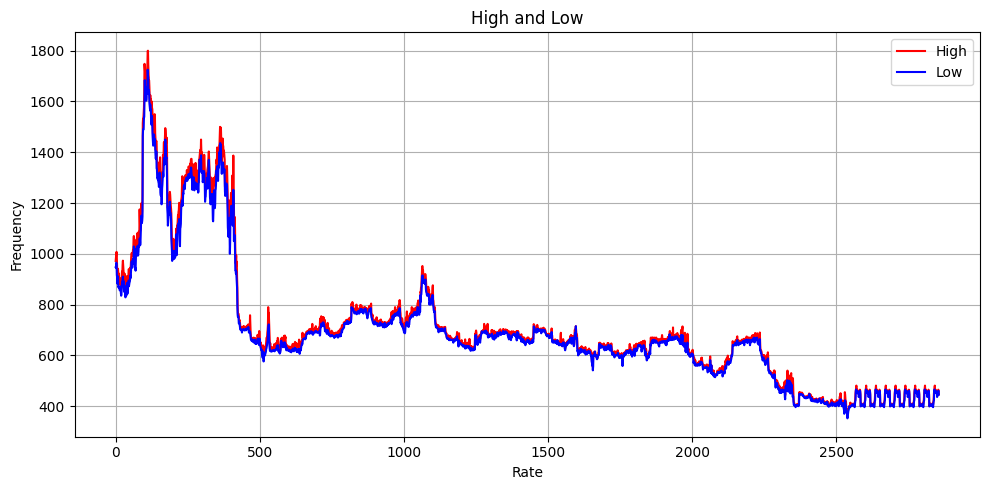

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['High'], label='High', color='red')
plt.plot(df['Low'], label='Low', color='blue')

plt.title('High and Low')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
df.shape

(2856, 8)

In [11]:
df.describe()

,Open,High,Low,Close,% change,Volume,TurnOver
count,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2.856000e+03
mean,703.780217,710.973179,694.399720,702.904902,0.021866,17101.269608,1.873917e+07
std,254.882823,261.251172,247.793769,254.397822,1.247255,41859.665437,5.357018e+07
min,366.000000,377.000000,352.000000,366.000000,-9.960000,10.000000,4.600000e+03
25%,576.000000,580.750000,570.000000,576.750000,0.000000,1497.500000,8.637375e+05
50%,660.000000,665.000000,653.000000,660.000000,0.000000,3847.000000,2.429285e+06
75%,728.000000,730.250000,721.000000,727.000000,0.000000,10705.000000,7.452845e+06
max,1748.200000,1799.900000,1725.000000,1779.000000,10.000000,433507.000000,6.044554e+08


In [12]:
df['Date'].unique()

array(['2022-08-03', '2022-08-02', '2022-08-01', ..., '2011-03-25',
       '2011-03-24', '2011-03-20'], dtype=object)

In [15]:
import matplotlib
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

features=['Open','High','Low']
X=df[features]
y=df['Close']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
print("\nModel training complete: ")

print(f"Coefficient (w1): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")




Model training complete: 
Coefficient (w1): -0.45602658417289044
Intercept (b): 0.2527270315564465


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Absolute error: ",metrics.mean_absolute_error(y_test,model.predict(X_test)))
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}") 


Mean Absolute error:  5.022793706256385
Mean Squared Error (MSE): 72.82
R-squared (R2): 1.00


In [28]:
import joblib
joblib.dump(model,'share_close_price.pkl')

['share_close_price.pkl']

In [29]:
model=joblib.load('share_close_price.pkl')

In [ ]:
open_price=float(input("Enter the open price: "))
High_price=float(input("Enter the high price: "))
Low_price=float(input("Enter the low price: "))

Outcome=model.predict([[open_price,High_price,Low_price]])
print(Outcome)

[964.14101442]


d:\TechAxis\week56\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
df.head(2)

,Date,Open,High,Low,Close,% change,Volume,TurnOver
0,2022-08-03,954.0,972.0,947.0,952.0,-1.14,39472.0,37811112.7
1,2022-08-02,972.0,987.0,945.0,963.0,-0.92,51573.0,49411242.8
